<a href="https://colab.research.google.com/github/maggiejohnson20/DataProcessingAndVisualization/blob/main/Quiz12Review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First, we always need to authenticate everything first. 

In [ ]:
from google.colab import auth
auth.authenticate_user()
print('Authenticated')

Authenticated


Let's show the total entries.

In [3]:
%%bigquery --project dataprocessingvisualization
SELECT 
  COUNT(*) as total_entries
  
FROM `bigquery-public-data.london_fire_brigade.fire_brigade_service_calls`

,total_entries
0,32247


Let's see how many false alarms went off from 10:00 PM and 5:00 AM.

In [6]:
%%bigquery --project dataprocessingvisualization
SELECT  COUNT(*) as number_of_false_alarms

FROM `bigquery-public-data.london_fire_brigade.fire_brigade_service_calls`
WHERE incident_group = "False Alarm" AND (hour_of_call >= 22 OR hour_of_call <= 4)

,number_of_false_alarms
0,2825


Let's find the average number of pumps that attend a fire. 

In [8]:
%%bigquery --project dataprocessingvisualization
SELECT  incident_group, AVG(num_pumps_attending) as average_pumps_attending

FROM `bigquery-public-data.london_fire_brigade.fire_brigade_service_calls`
GROUP BY incident_group

,incident_group,average_pumps_attending
0,False Alarm,1.725776
1,Fire,1.633012
2,Special Service,1.177192


Let's find the largest number of pumps that attend a road vehicle incident. 

In [9]:
%%bigquery --project dataprocessingvisualization
SELECT  incident_group, MAX(num_pumps_attending) as Max_pumps_attending

FROM `bigquery-public-data.london_fire_brigade.fire_brigade_service_calls`
GROUP BY incident_group

,incident_group,Max_pumps_attending
0,False Alarm,7
1,Fire,7
2,Special Service,6


### **Part 2**

Let's look at the temperatures throughout Oklahoma. 

To begin, we need to import the libraries and load the dataset. 

In [22]:
import requests
import pandas as pa
from bs4 import BeautifulSoup


r = requests.get('https://en.wikipedia.org/wiki/Oklahoma')
html_contents = r.text
html_soup = BeautifulSoup(html_contents,"lxml")
tables = html_soup.find_all('table',class_="wikitable")


In [17]:
df = pa.read_html(str(tables))[0]


df = df.melt(id_vars = ['City','Unnamed: 1'],
  value_vars = df.columns[3:],
  var_name = 'month'
)

df.value = df.value.apply(lambda s: int(s[:3]))

df.columns = ['Town','High_Low', 'Month','Temp_F']

df

,Town,High_Low,Month,Temp_F
0,Oklahoma City,Avg. high,Feb,55
1,Oklahoma City,Avg. low,Feb,33
2,Tulsa,Avg. high,Feb,53
3,Tulsa,Avg. low,Feb,31
4,Lawton,Avg. high,Feb,56
...,...,...,...,...
61,Oklahoma City,Avg. low,Dec,31
62,Tulsa,Avg. high,Dec,49
63,Tulsa,Avg. low,Dec,30
64,Lawton,Avg. high,Dec,52


Let's describe the data frame.

In [23]:
df.describe()

,Temp_F
count,66.000000
mean,63.424242
std,18.531520
min,30.000000
25%,51.000000
50%,63.000000
75%,73.000000
max,96.000000


Let's find the average high temperature for Oklahoma City.

In [26]:
df.query('Town == "Oklahoma City" and High_Low == "Avg. high"').Temp_F.mean()

74.27272727272727

Let's create a visualization of the average monthly low temperature in Tulsa.

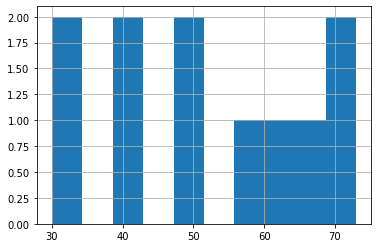

In [28]:
df.query('Town == "Tulsa" and High_Low == "Avg. low"').Temp_F.hist()

Finally, let's figure out the city that has the hottest temperature of each month. 

In [30]:
df.query('High_Low == "Avg. high"').groupby('Month').agg(['max'])

df[df.Temp_F == df.groupby('Month').Temp_F.transform(max)]

,Town,High_Low,Month,Temp_F
4,Lawton,Avg. high,Feb,56
10,Lawton,Avg. high,March,65
12,Oklahoma City,Avg. high,April,73
16,Lawton,Avg. high,April,73
22,Lawton,Avg. high,May,82
28,Lawton,Avg. high,June,90
34,Lawton,Avg. high,July,96
40,Lawton,Avg. high,Aug,95
46,Lawton,Avg. high,Sept,86
52,Lawton,Avg. high,Oct,76
